In [2]:
import pandas as pd
from sklearn.neural_network import MLPClassifier 
from sklearn.preprocessing import Normalizer 
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import precision_score, confusion_matrix
from sklearn.metrics import recall_score, make_scorer, f1_score

data=  pd.read_csv("data.csv")
data=  data.iloc[:, 1 :]


In [3]:
data = data.sort_values("target").iloc[-800:]


In [4]:
data["target"].value_counts()

target
0    484
1    316
Name: count, dtype: int64

In [5]:
X = data.iloc[:, 0 :16]
y = data.iloc[:, -1:]

In [6]:
data["target"].value_counts()

target
0    484
1    316
Name: count, dtype: int64

In [7]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size= 0.2, random_state=1)

In [8]:

grid = GridSearchCV(
             estimator=MLPClassifier(),
             param_grid={
                "hidden_layer_sizes" : [
                    (100),
                    (100, 100),
                    (100, 100, 100, 100),
                    (50, 50, 50, 50),
                ],
                "activation": ['relu', 'identity', 'logistic', 'tanh'],
                "learning_rate_init":[0.004, 0.01, 0.0001, 0.005],

             },
             cv=4,
             scoring={
                 "precision" : make_scorer(precision_score),
                 "recall" : make_scorer(recall_score),
                 "f1" : make_scorer(f1_score),
             },
             return_train_score=True,
             refit='f1',
            )

In [9]:
MLPClassifier().get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [10]:
grid.fit(Xtrain, Ytrain)

/home/rhavyyz/code/College/ic/neural_networks/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rhavyyz/code/College/ic/neural_networks/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/rhavyyz/code/College/ic/neural_networks/venv/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/rhavyyz/code/College/ic/neural_networks/venv/lib/python3.12/site-packages/skl

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'hidden_layer_sizes': [100, (100, 100),
                                                (100, 100, 100, 100),
                                                (50, 50, 50, 50)]},
             refit='f1', return_train_score=True,
             scoring={'f1': make_scorer(f1_score, response_method='predict'),
                      'precision': make_scorer(precision_score, response_method='predict'),
                      'recall': make_scorer(recall_score, response_method='predict')})

In [11]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,...,mean_test_f1,std_test_f1,rank_test_f1,split0_train_f1,split1_train_f1,split2_train_f1,split3_train_f1,split4_train_f1,mean_train_f1,std_train_f1
0,0.696640,0.221985,0.054643,0.018190,100,{'hidden_layer_sizes': 100},1.0,1.000000,1.0,1.00,...,1.000000,0.000000,1,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,0.690987,0.094260,0.014485,0.002503,"(100, 100)","{'hidden_layer_sizes': (100, 100)}",1.0,1.000000,1.0,1.00,...,0.997938,0.004124,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,0.846873,0.109323,0.013956,0.003598,"(100, 100, 100, 100)","{'hidden_layer_sizes': (100, 100, 100, 100)}",1.0,1.000000,1.0,1.00,...,0.997938,0.004124,2,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,1.759185,0.433258,0.051256,0.021506,"(50, 50, 50, 50)","{'hidden_layer_sizes': (50, 50, 50, 50)}",1.0,0.980392,1.0,0.98,...,0.983752,0.008178,4,1.0,1.0,1.0,1.0,1.0,1.0,0.0


In [16]:
results = grid.predict(Xtest)

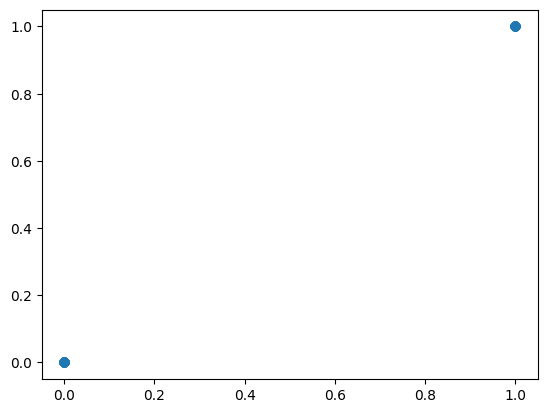

In [17]:
import matplotlib.pyplot as plt

plt.scatter(x=results, y=Ytest)
# plt.hist(results)

In [18]:
confusion_matrix(Ytest, results)

array([[91,  0],
       [ 0, 69]])

(array([91.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 69.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

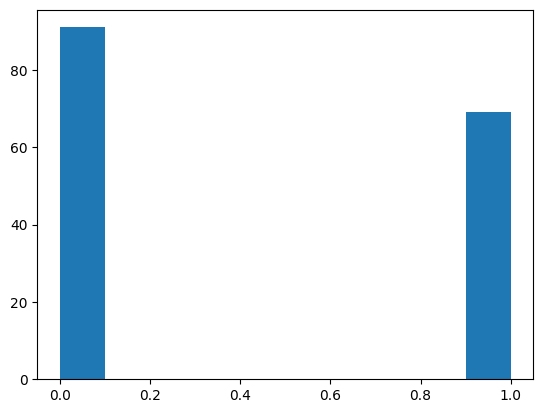

In [19]:
plt.hist(results)
